<a href="https://colab.research.google.com/github/phuongnt3391/HierarchicalClustering/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Feature Engineering

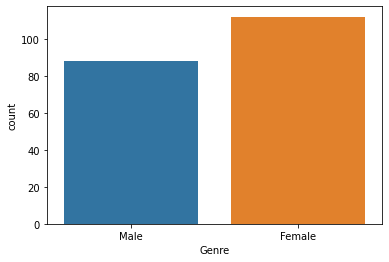

In [5]:
sns.countplot(data=df, x='Genre')



More Female customers shop at the mall than male customers


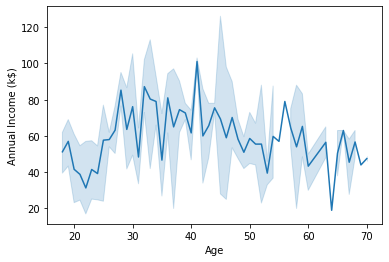

In [7]:
sns.lineplot(data=df,x='Age',y='Annual Income (k$)')

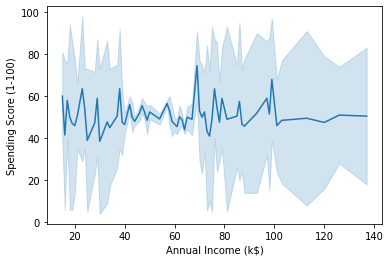

In [8]:
sns.lineplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

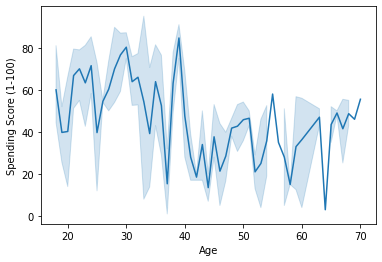

In [9]:


sns.lineplot(data=df,x='Age',y='Spending Score (1-100)')





Choose only 2 features: Annual income and Spending score


In [10]:
X = df.iloc[:,3:].values

Use a Dendogram to find the optimal number of clusters, instead of the Elbow method in KMeans Clustering

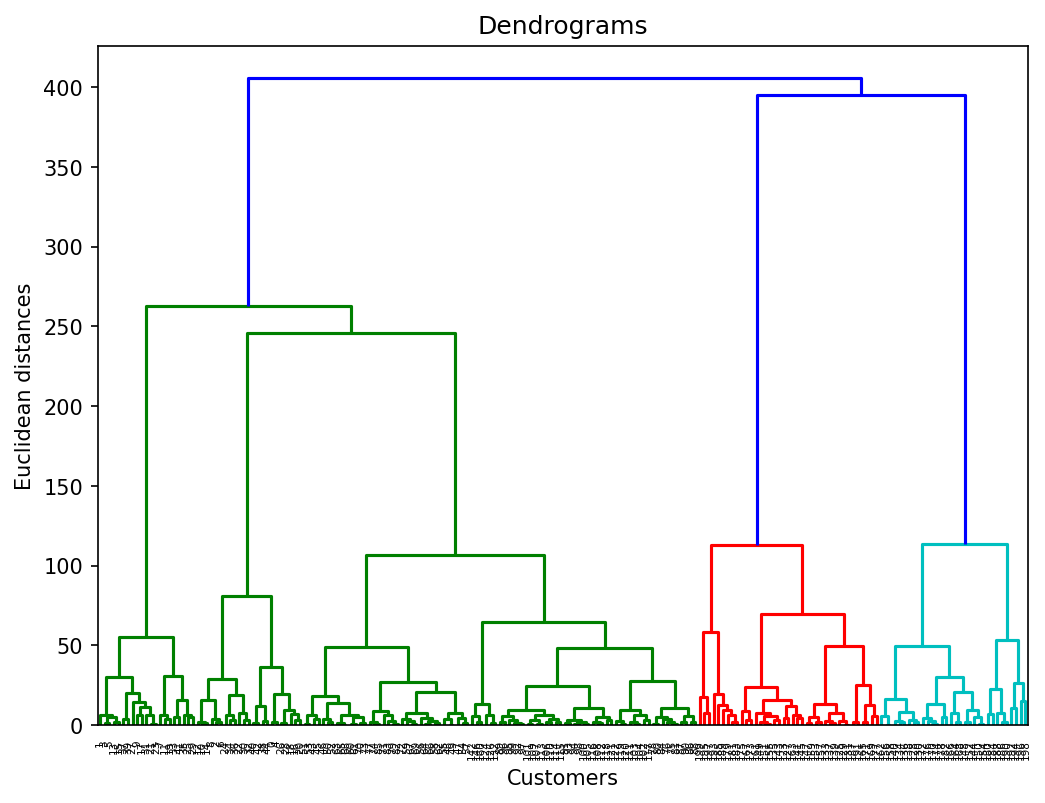

In [27]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,6),dpi=150)
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.title("Dendrograms")  
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


Choose the optimal number of clusters: k = 5

Training the Agglomerative Clustering model on the dataset

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster_label = hc.fit_predict(X)
print(cluster_label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing the clusters

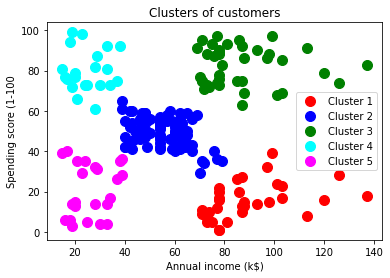

In [24]:
plt.scatter(X[cluster_label ==0,0],X[cluster_label ==0,1],s=100,c='red',label ='Cluster 1')
plt.scatter(X[cluster_label ==1,0],X[cluster_label ==1,1],s=100,c='blue',label ='Cluster 2')
plt.scatter(X[cluster_label ==2,0],X[cluster_label ==2,1],s=100,c='green',label ='Cluster 3')
plt.scatter(X[cluster_label ==3,0],X[cluster_label ==3,1],s=100,c='cyan',label ='Cluster 4')
plt.scatter(X[cluster_label ==4,0],X[cluster_label ==4,1],s=100,c='magenta',label ='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100')
plt.legend()
plt.show()